### Project (Mod 1 Project - Flatiron Data Science Bootcamp, March , 2020 Washington, D.C.)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('imdb_final.csv')

In [3]:
df.head()

,Unnamed: 0,popularity,vote_average,vote_count,production_budget,worldwide_gross,profit,genre
0,0,6.099,3.3,102,1500000,0,-1500000,crime
1,1,17.892,6.9,4629,5000000,108286422,103286422,drama
2,2,0.955,5.4,7,12000000,14616,-11985384,drama
3,3,13.183,5.6,1312,35000000,71118378,36118378,action
4,4,16.493,7.9,6631,20000000,181025343,161025343,biography


In [4]:
data = df.drop(columns = ['Unnamed: 0'])

In [5]:
data.head()

,popularity,vote_average,vote_count,production_budget,worldwide_gross,profit,genre
0,6.099,3.3,102,1500000,0,-1500000,crime
1,17.892,6.9,4629,5000000,108286422,103286422,drama
2,0.955,5.4,7,12000000,14616,-11985384,drama
3,13.183,5.6,1312,35000000,71118378,36118378,action
4,16.493,7.9,6631,20000000,181025343,161025343,biography


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 7 columns):
popularity           1834 non-null float64
vote_average         1834 non-null float64
vote_count           1834 non-null int64
production_budget    1834 non-null int64
worldwide_gross      1834 non-null int64
profit               1834 non-null int64
genre                1834 non-null object
dtypes: float64(2), int64(4), object(1)
memory usage: 100.4+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,1834.0,1.093118e+01,8.180437e+00,0.6,6.110250e+00,9.592500e+00,1.444975e+01,8.077300e+01
vote_average,1834.0,6.176172e+00,1.096821e+00,0.0,5.600000e+00,6.200000e+00,6.900000e+00,1.000000e+01
vote_count,1834.0,1.704709e+03,2.689767e+03,1.0,8.525000e+01,6.535000e+02,2.092250e+03,2.218600e+04
production_budget,1834.0,3.834575e+07,5.200167e+07,9000.0,5.000000e+06,2.000000e+07,4.600000e+07,4.250000e+08
worldwide_gross,1834.0,1.190712e+08,2.226756e+08,0.0,3.287706e+06,3.668101e+07,1.227451e+08,2.776345e+09
profit,1834.0,8.072547e+07,1.836923e+08,-110450242.0,-1.688551e+06,1.364081e+07,7.689673e+07,2.351345e+09


In [8]:
data.shape

(1834, 7)

In [9]:
# Check for missing values by column
data.isna().sum()

popularity           0
vote_average         0
vote_count           0
production_budget    0
worldwide_gross      0
profit               0
genre                0
dtype: int64

## Step 1 Train/test Split

### Target is profit

In [10]:
X = data.drop(columns =['profit'])
y = data['profit']

In [11]:
# split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = .20)

In [12]:
# get the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1467, 6), (367, 6), (1467,), (367,))

### Step 2- Exploratory Data Analysis

checking missing valuses etc. our data is already clean 

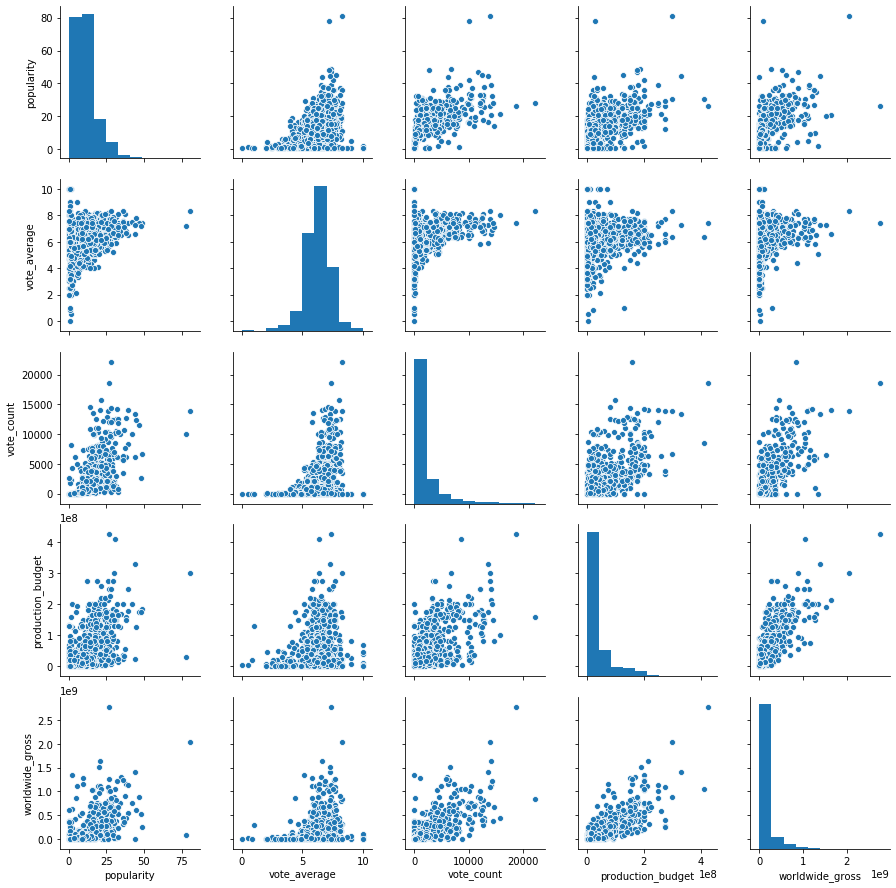

In [13]:
#create scatterplot matrix
sns.pairplot(X_train)

### Next let's look at the distribution of our variables

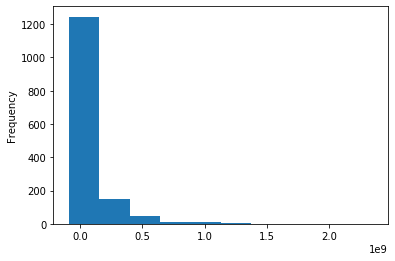

In [14]:
#histogram of y_train
y_train.plot(kind='hist')

### Do we have any categorical variables we need to encode?

## Step 3: Dummy variable.

In [15]:
dummies=pd.get_dummies(X_train['genre'], drop_first=True)
X_train = pd.concat([dummies, X_train], axis=1)
X_train = X_train.drop(columns=['genre'])

In [16]:
X_train.head()

,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,horror,music,musical,mystery,romance,sci-fi,sport,thriller,western,popularity,vote_average,vote_count,production_budget,worldwide_gross
383,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.407,6.3,4106,75000000,1034727750
408,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.246,7.2,954,7000000,18190831
1677,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.241,6.3,398,5000000,3187302
1504,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.352,7.2,2882,80000000,310660018
593,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.312,5.9,2328,22000000,64160680


In [17]:
ss = StandardScaler()
X_train_cont=X_train[['popularity','vote_average', 'vote_count', 'production_budget', 'worldwide_gross']]
X_train_cont = pd.DataFrame(ss.fit_transform(X_train_cont), columns=X_train_cont.columns)
X_train_scaled = dummies.join(X_train_cont, on=X_train_cont.index)
X_train_scaled

,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,horror,music,musical,mystery,romance,sci-fi,sport,thriller,western,popularity,vote_average,vote_count,production_budget,worldwide_gross
383,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.672582,0.100561,0.924956,0.695602,4.106879
408,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.219815,0.938229,-0.282357,-0.607830,-0.451063
1677,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.028800,0.100561,-0.495322,-0.646166,-0.518336
1504,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.039585,0.938229,0.456126,0.791443,0.860308
593,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.162267,-0.271736,0.243927,-0.320308,-0.244944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.371351,1.124377,-0.590696,-0.646166,-0.530084
1294,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.070548,-0.830182,-0.341727,-0.166963,-0.281103
860,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.290224,0.007487,-0.222604,-0.464069,0.021842
1459,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.173207,-0.457885,-0.466211,0.024718,-0.392767


In [18]:
X_train_scaled.shape

(1467, 23)

### Outlier Removal

## Step 4 - Messy Model

### First let's use statsmodels

In [19]:
#Linear regression using statsmodels
X_train_const = sm.add_constant(X_train_scaled)
model =sm.OLS(y_train, X_train_const, hascont=True)
fitted_model = model.fit()
fitted_model.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.869e+31
Date:                Tue, 19 May 2020   Prob (F-statistic):               0.00
Time:                        15:03:16   Log-Likelihood:                 20315.
No. Observations:                1467   AIC:                        -4.058e+04
Df Residuals:                    1443   BIC:                        -4.046e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.008e+07   1.32e-08   6.07e+15      0.000    8.01e+07    8.01e+07
adventure          1.923e-07   2.48e-08      7.765      0.000    1.44e-07    2.41e-07
animation          8.941e-08   7.59e-08      1.178      0.239   -5.95e-08    2.38e-07
biography          1.001e-08   2.74e-08      0.365      0.715   -4.38e-08    6.39e-08
comedy            -4.284e-08      2e-08     -2.144      0.032    -8.2e-08   -3.64e-09
crime             -1.157e-07   3.22e-08     -3.593      0.000   -1.79e-07   -5.25e-08
documentary       -1.108e-07   3.16e-08     -3.513      0.000   -1.73e-07   -4.89e-08
drama             -2.831e-07   2.08e-08    -13.596      0.000   -3.24e-07   -2.42e-07
family            -3.427e-07   1.07e-07     -3.203      0.001   -5.53e-07   -1.33e-07
fantasy            1.749e-07   8.47e-08      2.065      0.039    8.74e-09    3.41e-07
horror             6.333e-08   2.83e-08      2.242      0.025    7.91e-09    1.19e-07
music              1.863e-08   2.38e-07      0.078      0.938   -4.48e-07    4.86e-07
musical           -2.459e-07   2.37e-07     -1.038      0.299   -7.11e-07    2.19e-07
mystery            1.015e-07   9.07e-08      1.119      0.263   -7.64e-08    2.79e-07
romance           -5.849e-07   1.68e-07     -3.491      0.000   -9.14e-07   -2.56e-07
sci-fi             8.511e-07   1.37e-07      6.205      0.000    5.82e-07    1.12e-06
sport             -4.098e-08   2.37e-07     -0.173      0.863   -5.06e-07    4.24e-07
thriller           -1.08e-07   6.27e-08     -1.722      0.085   -2.31e-07     1.5e-08
western            2.179e-07   1.68e-07      1.298      0.195   -1.12e-07    5.47e-07
popularity        -4.843e-08   9.15e-09     -5.294      0.000   -6.64e-08   -3.05e-08
vote_average      -3.329e-08   7.16e-09     -4.652      0.000   -4.73e-08   -1.93e-08
vote_count         3.166e-08   1.11e-08      2.858      0.004    9.93e-09    5.34e-08
production_budget -5.217e+07   1.13e-08  -4.63e+15      0.000   -5.22e+07   -5.22e+07
worldwide_gross     2.23e+08    1.2e-08   1.86e+16      0.000    2.23e+08    2.23e+08
==============================================================================
Omnibus:                      581.912   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5458.091
Skew:                           1.584   Prob(JB):                         0.00
Kurtosis:                      11.903   Cond. No.                         68.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Now let's use sklearn

In [20]:
#initialize a linear regression model in sklearn
linreg = LinearRegression()

In [21]:
#fit linear model to training data
linreg.fit(X_train_scaled, y_train)
linreg.score(X_train_scaled, y_train)

1.0

In [22]:
linreg.coef_

array([-1.78214770e-07,  9.98377800e-07,  8.38190317e-09,  1.22934580e-07,
        4.93600965e-08,  1.49011612e-08,  6.33299351e-08, -1.27183739e-07,
       -3.95812094e-08, -1.32247806e-07,  6.45071850e-07,  1.02518243e-07,
       -7.62520358e-08,  1.84634700e-07, -2.20490620e-07,  2.16954504e-07,
       -1.06636435e-07,  2.37370841e-07, -2.12341547e-07, -2.14204192e-08,
       -1.93715096e-07, -5.21699555e+07,  2.23025395e+08])

In [23]:
#get r squared value from sklearn
X_train_scaled.shape

(1467, 23)

## Step 5 - Model Evaluation

In [25]:
#get r squared value from sklearn
X_train_scaled.shape

(1467, 23)

In [24]:
#create formula for adjusted r squared
def adjusted_r_suared(r_squared, num_samples, num_regressors):
    return 1 - ((1-r_squared)*(num_samples - 1) / (num_samples - num_regressors - 1))

In [26]:
#calculate adjusted r squared
adjusted_r_suared(1, 1467, 23)

1.0

What does the r-squared value mean? What do the r-squared values tell us about the fit of our model? What about adjusted r-squared?

### Now let's look at predictions of relative performance to compare to actual relative performance

In [27]:
linreg_results_df = pd.DataFrame(linreg.predict(X_train), y_train).reset_index()

In [30]:
linreg_results_df.columns = ['Actual_profit', 'Predicted_Profit']

In [31]:
linreg_results_df.head()

,Actual_profit,Predicted_Profit
0,959727750,2.268578e+17
1,11190831,3.691828e+15
2,-1812698,4.499996e+14
3,230660018,6.511148e+16
4,42160680,1.316172e+16


## Let's use regularization to see if that helps our model fit

In [32]:
#importing Lasso and Ridge models from sklearn
from sklearn.linear_model import Lasso, Ridge

## Lasso Regularizer

In [33]:
#conduct lasso regression on training data
lasso = Lasso()

In [34]:
#Evaluation of lasso on training data
lasso.fit(X_train_scaled, y_train)
lasso.score(X_train_scaled, y_train)

0.9999999942793854

In [35]:
#examine coefficients from lasso
lasso.coef_

array([ 6.17155966e+03,  1.05697194e+04,  3.60062995e+03,  4.34241428e+03,
        3.46849626e+03,  6.83112183e+03,  4.66298144e+03, -5.47932702e+03,
        6.55448564e+03, -8.76513702e+01,  1.90039781e+04,  1.64039924e+04,
        1.77420904e+04,  2.38135346e+03,  1.33872728e+03,  1.87910889e+04,
        6.39177682e+03,  1.51410304e+04,  1.50333884e+04,  8.59738330e+02,
       -1.25081228e+04, -5.21865274e+07,  2.23039731e+08])

## Ridge Regularizer

In [36]:
#conduct ridge regression on training data
ridge = Ridge()

In [37]:
#Evaluation of ridge on training data
ridge.fit(X_train_scaled, y_train)
ridge.score(X_train_scaled, y_train)

0.9999966391071718

In [38]:
#examine coefficients from ridge
ridge.coef_

array([ 1.44807881e+05,  1.78273870e+05,  1.03471933e+05,  1.23028407e+05,
        7.31263373e+04,  1.25931254e+05,  8.89687126e+04,  4.51632202e+05,
       -1.83709993e+04,  2.27985279e+05, -3.55933576e+04,  7.40908373e+04,
        5.58946862e+04,  4.37645347e+04,  1.18442428e+05,  1.75465517e+04,
        9.22470399e+04,  1.21831846e+05, -3.15232904e+04,  7.83501941e+03,
        2.26962239e+05, -5.17259014e+07,  2.22376701e+08])

## Step 6 - Best Model Evaluation

## Step 7 - Model Interpretation

What take-ways do we have? Conclusions about our initial question? Who would care? Why do they care?